# IMPORTING MODULES

In [15]:
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET


In [16]:
dataset = pd.read_csv("FuelConsumption.csv")

In [17]:
dataset.shape

(1068, 13)

In [14]:
# dataset.to_excel("Dataset_brfore_PreProcessing.xlsx", index = False, header = True)

ModuleNotFoundError: No module named 'openpyxl'

In [18]:
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014.0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014.0,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014.0,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014.0,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014.0,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [19]:
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,2014.0,3.346255,5.793071,13.296536,9.474625,11.580899,26.441011,256.228464
std,0.0,1.415232,1.797444,4.099331,2.793201,3.483961,7.465214,63.342601
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.275000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.525000,10.825000,13.325000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   float64
 1   MAKE                      1068 non-null   object 
 2   MODEL                     1068 non-null   object 
 3   VEHICLECLASS              1068 non-null   object 
 4   ENGINESIZE                1068 non-null   float64
 5   CYLINDERS                 1068 non-null   int64  
 6   TRANSMISSION              1068 non-null   object 
 7   FUELTYPE                  1068 non-null   object 
 8   FUELCONSUMPTION_CITY      1068 non-null   float64
 9   FUELCONSUMPTION_HWY       1068 non-null   float64
 10  FUELCONSUMPTION_COMB      1068 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1068 non-null   int64  
 12  CO2EMISSIONS              1068 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 108.6+ KB


# CLEANING AND PREPARING DATASET FOR TRAINING (PREPROCESSING)

## Handling Outliers

In [21]:
#Finding IQR
Q1 = dataset.iloc[:, -1].quantile(0.25)
Q3 = dataset.iloc[:, -1].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
print(f'Range = ({LB}, {UB})')

Range = (76.5, 424.5)


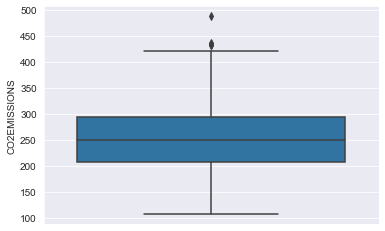

In [22]:
#Displaying Boxplot
sns.boxplot( y=dataset.iloc[:, -1])
plt.show()

In [23]:
#Counting number of outliers
req_val = []
outliers = []
for i in dataset.iloc[:, -1]:
  if i > UB:
    outliers.append(i)
  elif i < LB:
    outliers.append(i)
  else:
    req_val.append(i) 

print(f'Number of outliers = {len(outliers)}')
print(f"Total number of requireed rows = {len(req_val)}")

Number of outliers = 6
Total number of requireed rows = 1062


In [24]:
#Removing outliers
df = dataset[~((dataset.iloc[:, -1] < LB) |(dataset.iloc[:, -1] > UB))]

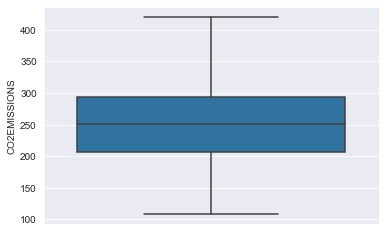

In [25]:
#Displaying Boxplot
sns.boxplot(y = df.iloc[:, -1])
plt.show()

## Building Featue and Target dataframes

In [26]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## Handling Correlated Features

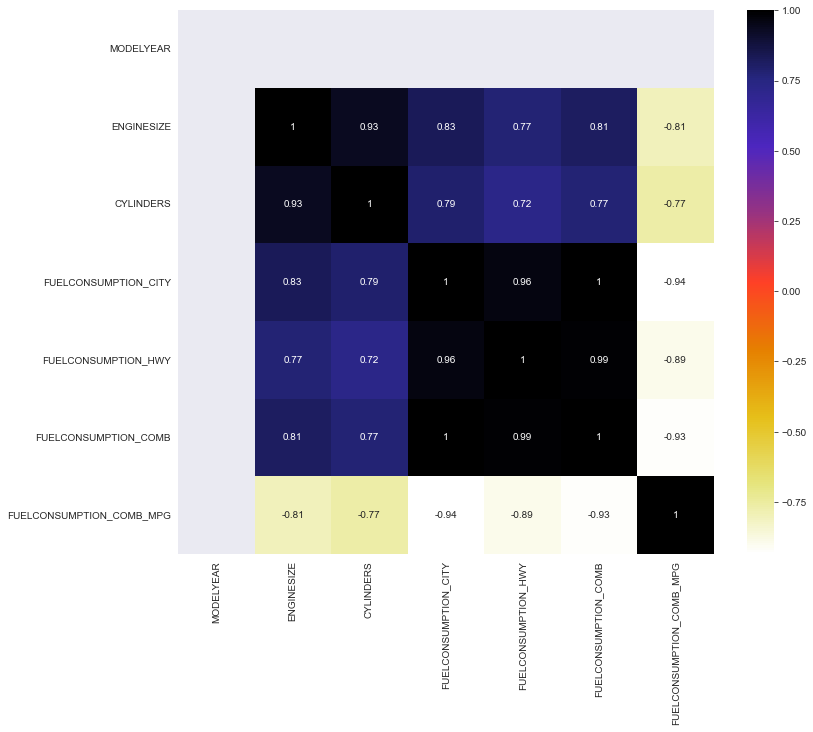

In [27]:
#Findind Correlation among features
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [28]:
#With the following function we can select highly correlated features
#it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
corr_features = correlation(X, 0.8)
corr_features

{'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'FUELCONSUMPTION_HWY'}

In [30]:
#Removing highly correlated and not useful features
X.drop(["MODELYEAR","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"], axis=1, inplace=True)

In [31]:
X.shape

(1062, 7)

In [32]:
X.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB_MPG
0,ACURA,ILX,COMPACT,2.0,AS5,Z,33
1,ACURA,ILX,COMPACT,2.4,M6,Z,29
2,ACURA,ILX HYBRID,COMPACT,1.5,AV7,Z,48
3,ACURA,MDX 4WD,SUV - SMALL,3.5,AS6,Z,25
4,ACURA,RDX AWD,SUV - SMALL,3.5,AS6,Z,27


## OneHotEncoding

In [33]:
#Total features before performing One Hot Encoding on current data
print("Total number of Features resulted after One_Hot_Encoding_Top_X : ", len(X.columns))

Total number of Features resulted after One_Hot_Encoding_Top_X :  7


In [34]:
#Making Dictionary of Categorical features with required number of important unique labels 
one_hot_features = {"MAKE":35, "MODEL":10, "VEHICLECLASS":15, "TRANSMISSION":5, "FUELTYPE":5}

In [35]:
#Total number of unique labels in each feature
labels = []
features = []
limits = []
for col, limit in one_hot_features.items():
  print(col, ':', len(X[col].unique()), 'labels')
  labels.append(len(X[col].unique()))
  features.append(col)
  limits.append(limit)

MAKE : 40 labels
MODEL : 662 labels
VEHICLECLASS : 17 labels
TRANSMISSION : 23 labels
FUELTYPE : 5 labels


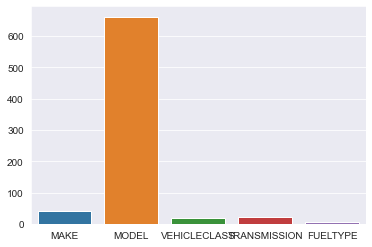

In [36]:
#Plotting Bar Graph to represent number of unique labels before One_Hot_Encoding_Top_X
sns.barplot(x = features, y = labels)
sns.set(rc = {'figure.figsize':(20,12)})
plt.show()

In [37]:
#Total features we will get after performing One Hot Encoding on current data
print("Total number of Features to be resulted after Standard One Hot Encoding : ", pd.get_dummies(X, drop_first = True).shape[1])

Total number of Features to be resulted after Standard One Hot Encoding :  744


In [38]:
#Function to perform One_Hot_Encoding_Top_X
def one_hot_encoding_top_x(df, variable, top_x_labels):
  for label in top_x_labels:
    df[variable+'_'+label] = np.where(df[variable] == label, 1, 0)
  df.drop([variable], axis=1, inplace=True)

In [39]:
#Performing One_Hot_Encoding_Top_X
for variable, limit in one_hot_features.items():
  top_x_labels = [x for x in X[variable].value_counts().sort_values(ascending = False).head(limit).index]
  one_hot_encoding_top_x(X, variable, top_x_labels)

In [40]:
#Total features we are getting after performing One Hot Encoding on current data
print("Total number of Features resulted after One_Hot_Encoding_Top_X : ", len(X.columns))

Total number of Features resulted after One_Hot_Encoding_Top_X :  72


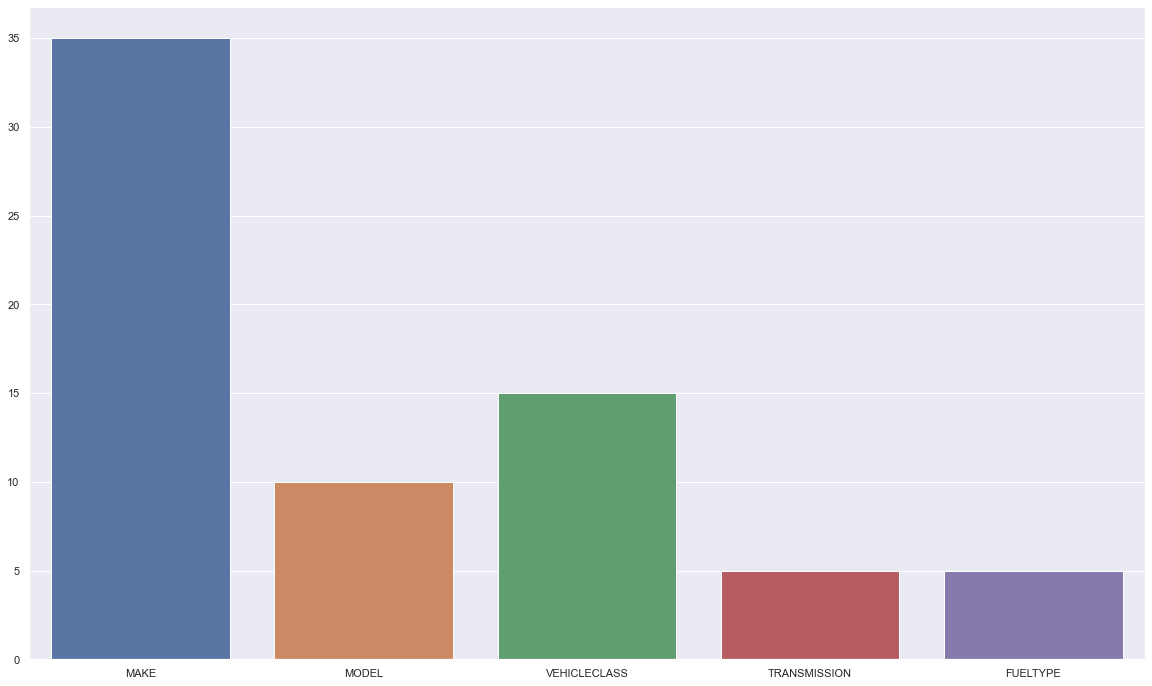

In [41]:
#Plotting Bar Graph to represent number of unique labels after One_Hot_Encoding_Top_X
sns.barplot(x = features, y = limits)
sns.set(rc = {'figure.figsize':(20,12)})
plt.show()

# DATA AFTER PREPROCESSING

## Features

In [42]:
X.shape

(1062, 72)

In [43]:
X.head(20)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,MAKE_FORD,MAKE_CHEVROLET,MAKE_BMW,MAKE_MERCEDES-BENZ,MAKE_TOYOTA,MAKE_AUDI,MAKE_GMC,MAKE_PORSCHE,...,TRANSMISSION_A6,TRANSMISSION_AS6,TRANSMISSION_M6,TRANSMISSION_A8,TRANSMISSION_AS8,FUELTYPE_X,FUELTYPE_Z,FUELTYPE_E,FUELTYPE_D,FUELTYPE_UNKNOWN
0,2.0,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2.4,29,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1.5,48,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3.5,25,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,3.5,27,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,3.5,28,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,3.5,28,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,3.7,25,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8,3.7,24,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9,2.4,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
X.columns

Index(['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG', 'MAKE_FORD', 'MAKE_CHEVROLET',
       'MAKE_BMW', 'MAKE_MERCEDES-BENZ', 'MAKE_TOYOTA', 'MAKE_AUDI',
       'MAKE_GMC', 'MAKE_PORSCHE', 'MAKE_VOLKSWAGEN', 'MAKE_DODGE',
       'MAKE_MINI', 'MAKE_KIA', 'MAKE_NISSAN', 'MAKE_CADILLAC', 'MAKE_JEEP',
       'MAKE_MAZDA', 'MAKE_HYUNDAI', 'MAKE_SUBARU', 'MAKE_LEXUS',
       'MAKE_JAGUAR', 'MAKE_INFINITI', 'MAKE_HONDA', 'MAKE_CHRYSLER',
       'MAKE_LAND ROVER', 'MAKE_MITSUBISHI', 'MAKE_BUICK', 'MAKE_RAM',
       'MAKE_ACURA', 'MAKE_LINCOLN', 'MAKE_VOLVO', 'MAKE_FIAT', 'MAKE_SCION',
       'MAKE_ASTON MARTIN', 'MAKE_ROLLS-ROYCE', 'MAKE_BENTLEY',
       'MODEL_F150 FFV', 'MODEL_F150 FFV 4X4', 'MODEL_FOCUS FFV',
       'MODEL_BEETLE', 'MODEL_ACCORD', 'MODEL_SIERRA 4WD', 'MODEL_MUSTANG',
       'MODEL_SIERRA', 'MODEL_SILVERADO 4WD', 'MODEL_SILVERADO',
       'VEHICLECLASS_MID-SIZE', 'VEHICLECLASS_COMPACT',
       'VEHICLECLASS_SUV - SMALL', 'VEHICLECLASS_SUV - STANDARD',
       'VEHICLECLASS_FULL-SI

## Labels

In [45]:
y.shape

(1062,)

In [46]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

## Splitting Features & Labels Into Training & Testing Data

In [47]:
#TrainTestSplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)

# TRAINING MODEL

## Random Forest Regressor

In [48]:
#Training
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [49]:
#Testing on Validation Data
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train, cv = 10)
val_acc_rf = accuracies.mean()*100

print("Accuracy: {:.2f} %".format(val_acc_rf))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.61 %
Standard Deviation: 0.77 %


In [50]:
#Testing on Testing Data
y_pred_rf = regressor_rf.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred_rf)
test_acc_rf = r2*100

print("Accuracy :", test_acc_rf)

Accuracy : 98.84138225725712


## KNN Regressor

In [51]:
#Training
from sklearn.neighbors import KNeighborsRegressor
regressor_knn = KNeighborsRegressor(n_neighbors = 10)
regressor_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [52]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor_knn, X = X_train, y = y_train, cv = 10)
val_acc_knn = accuracies.mean()*100

print("Accuracy: {:.2f} %".format(val_acc_knn))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.09 %
Standard Deviation: 2.81 %


In [53]:
y_pred_knn = regressor_knn.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred_knn)
test_acc_knn = r2*100

print("Accuracy :", test_acc_knn)

Accuracy : 95.9148541798618


## Linear Regressor

In [54]:
#Training
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)

LinearRegression()

In [55]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor_lr, X = X_train, y = y_train, cv = 10)
val_acc_lr = accuracies.mean()*100

print("Accuracy: {:.2f} %".format(val_acc_lr))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.12 %
Standard Deviation: 1.48 %


In [56]:
y_pred_knn = regressor_lr.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred_knn)
test_acc_lr = r2*100

print("Accuracy :", test_acc_lr)

Accuracy : 95.38960441400468


## Decision Tree Regressor

In [57]:
#Training
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [58]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)
val_acc_dt = accuracies.mean()*100

print("Accuracy: {:.2f} %".format(val_acc_dt))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.82 %
Standard Deviation: 0.68 %


In [59]:
y_pred_knn = regressor_dt.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred_knn)
test_acc_dt = r2*100

print("Accuracy :", test_acc_dt)

Accuracy : 98.40022815258165


## SVM Regressor

In [60]:
#Training
from sklearn.svm import SVR
regressor_svm = SVR(kernel = "linear")
regressor_svm.fit(X_train, y_train)

SVR(kernel='linear')

In [61]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor_svm, X = X_train, y = y_train, cv = 10)
val_acc_svm = accuracies.mean()*100

print("Accuracy: {:.2f} %".format(val_acc_svm))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.81 %
Standard Deviation: 2.59 %


In [62]:
y_pred_knn = regressor_svm.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred_knn)
test_acc_svm = r2*100

print("Accuracy :", test_acc_svm)

Accuracy : 91.27750927661538


# TESTING MODELS ON EXTERNEL DATA

## Loading Testing Data

In [63]:
testing_data_X = pd.read_csv("Testing_data_X.csv")
testing_data_y = pd.read_csv("Testing_data_y.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Testing_data_X.csv'

In [ ]:
testing_data_X.shape

(7305, 72)

In [ ]:
testing_data_X.head()

,Engine Size(L),Fuel Consumption Comb (mpg),Make_FORD,Make_CHEVROLET,Make_BMW,Make_MERCEDES-BENZ,Make_PORSCHE,Make_TOYOTA,Make_GMC,Make_AUDI,...,Transmission_AS6,Transmission_AS8,Transmission_M6,Transmission_A6,Transmission_A8,Fuel Type_X,Fuel Type_Z,Fuel Type_E,Fuel Type_D,Fuel Type_N
0,2.0,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2.4,29,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1.5,48,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3.5,25,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,3.5,27,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
testing_data_y.shape

(7305, 1)

In [ ]:
testing_data_y.head()

,CO2 Emissions(g/km)
0,196
1,221
2,136
3,255
4,244


## Random Forest Regressor

In [ ]:
y_pred_rf = regressor_rf.predict(testing_data_X)
r2 = metrics.r2_score(testing_data_y, y_pred_rf)
rf_accuracy = r2*100
print("Accuracy :", rf_accuracy)

Accuracy : 98.02355093131162


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Engine Size(L)
- Fuel Consumption Comb (mpg)
- Fuel Type_D
- Fuel Type_E
- Fuel Type_N
- ...
Feature names seen at fit time, yet now missing:
- ENGINESIZE
- FUELCONSUMPTION_COMB_MPG
- FUELTYPE_D
- FUELTYPE_E
- FUELTYPE_UNKNOWN
- ...

  warnings.warn(message, FutureWarning)


## KNN Regressor

In [ ]:
y_pred_rf = regressor_knn.predict(testing_data_X)
r2 = metrics.r2_score(testing_data_y, y_pred_rf)
knn_accuracy = r2*100
print("Accuracy :", knn_accuracy)

Accuracy : 95.55813853315898


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Engine Size(L)
- Fuel Consumption Comb (mpg)
- Fuel Type_D
- Fuel Type_E
- Fuel Type_N
- ...
Feature names seen at fit time, yet now missing:
- ENGINESIZE
- FUELCONSUMPTION_COMB_MPG
- FUELTYPE_D
- FUELTYPE_E
- FUELTYPE_UNKNOWN
- ...

  warnings.warn(message, FutureWarning)


## Linear Regressor

In [ ]:
y_pred_rf = regressor_lr.predict(testing_data_X)
r2 = metrics.r2_score(testing_data_y, y_pred_rf)
lr_accuracy = r2*100
print("Accuracy :", lr_accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Engine Size(L)
- Fuel Consumption Comb (mpg)
- Fuel Type_D
- Fuel Type_E
- Fuel Type_N
- ...
Feature names seen at fit time, yet now missing:
- ENGINESIZE
- FUELCONSUMPTION_COMB_MPG
- FUELTYPE_D
- FUELTYPE_E
- FUELTYPE_UNKNOWN
- ...

  warnings.warn(message, FutureWarning)


Accuracy : 89.38504242500103


## Decision Tree Regressor

In [ ]:
y_pred_rf = regressor_dt.predict(testing_data_X)
r2 = metrics.r2_score(testing_data_y, y_pred_rf)
dt_accuracy = r2*100
print("Accuracy :", dt_accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Engine Size(L)
- Fuel Consumption Comb (mpg)
- Fuel Type_D
- Fuel Type_E
- Fuel Type_N
- ...
Feature names seen at fit time, yet now missing:
- ENGINESIZE
- FUELCONSUMPTION_COMB_MPG
- FUELTYPE_D
- FUELTYPE_E
- FUELTYPE_UNKNOWN
- ...

  warnings.warn(message, FutureWarning)


Accuracy : 97.51053413699186


## SVM Regressor

In [ ]:
y_pred_rf = regressor_svm.predict(testing_data_X)
r2 = metrics.r2_score(testing_data_y, y_pred_rf)
svm_accuracy = r2*100
print("Accuracy :", svm_accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Engine Size(L)
- Fuel Consumption Comb (mpg)
- Fuel Type_D
- Fuel Type_E
- Fuel Type_N
- ...
Feature names seen at fit time, yet now missing:
- ENGINESIZE
- FUELCONSUMPTION_COMB_MPG
- FUELTYPE_D
- FUELTYPE_E
- FUELTYPE_UNKNOWN
- ...

  warnings.warn(message, FutureWarning)


Accuracy : 91.03039488708063


# MODEL COMPARISON

In [ ]:
#Building Dictionary of all accuracies
Accuracy_Data = {"Models" : ['Random Forest', 'Decision Tree', 'KNN', 'SVM', 'Linear Regression'],
                    "val_accuracies" : [val_acc_rf, val_acc_dt, val_acc_knn, val_acc_svm, val_acc_lr],
                    "test_accuracies" : [test_acc_rf, test_acc_dt, test_acc_knn, test_acc_svm, test_acc_lr],
                    "final_accuracies" : [rf_accuracy, dt_accuracy, knn_accuracy,  svm_accuracy, lr_accuracy]}

In [ ]:
#COnverting Dictionary into DataFrame
Accuracy_Data = pd.DataFrame(Accuracy_Data) 
Accuracy_Data

,Models,val_accuracies,test_accuracies,final_accuracies
0,Random Forest,98.607363,98.841382,98.023551
1,Decision Tree,98.900391,98.444847,97.510534
2,KNN,95.081992,95.889302,95.558139
3,SVM,92.810665,91.277509,91.030395
4,Linear Regression,96.118076,95.389604,89.385042


In [ ]:
#Transforming DataFrame
Accuracy_Data = pd.melt(Accuracy_Data, id_vars="Models",
                        var_name="Types of Accuracies",
                        value_name="Accuracies")
Accuracy_Data

,Models,Types of Accuracies,Accuracies
0,Random Forest,val_accuracies,98.607363
1,Decision Tree,val_accuracies,98.900391
2,KNN,val_accuracies,95.081992
3,SVM,val_accuracies,92.810665
4,Linear Regression,val_accuracies,96.118076
5,Random Forest,test_accuracies,98.841382
6,Decision Tree,test_accuracies,98.444847
7,KNN,test_accuracies,95.889302
8,SVM,test_accuracies,91.277509
9,Linear Regression,test_accuracies,95.389604


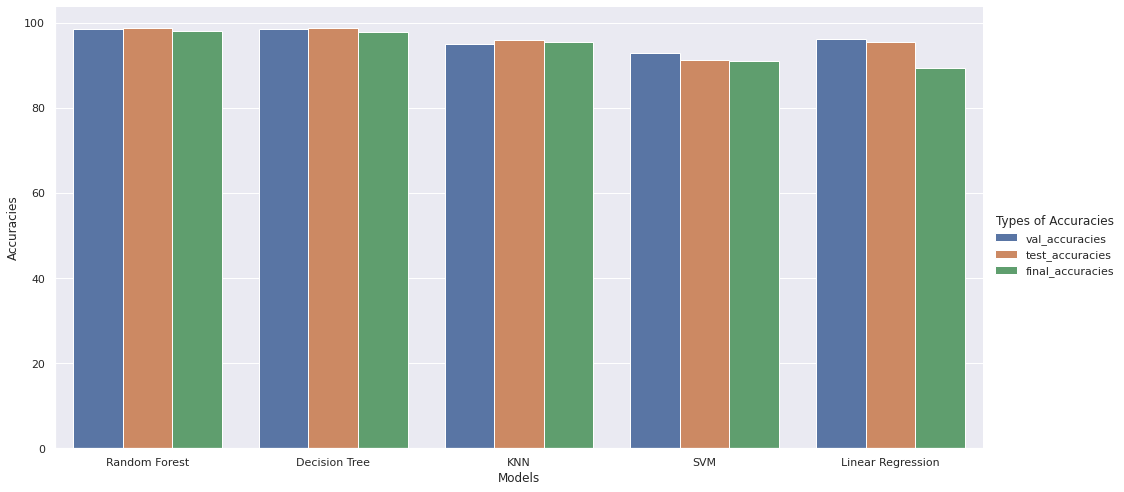

In [ ]:
#Plotting DataFrame   
# sns.set(rc = {'figure.figsize':(50,15)})
sns.catplot(x='Models', y='Accuracies', hue='Types of Accuracies', data=Accuracy_Data, kind='bar', height=7, aspect=2)